# Look-alike Analysis

Find and target look-alike customers to increasing feature adoption and measure its impact on customer satisfaction

## Performing Exploratory Data Analysis (EDA)

In [89]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [91]:
# Import Data 
data = pd.read_csv('data/simulated_product_usage_data.csv') 

### 1. Study basic structure of data 

In [94]:
data.head()

,customer_id,tenure_months,plan_type,satisfaction_score,uses_new_feature,login_frequency_per_week,last_login_date,feature_A_usage,feature_B_usage,feature_C_usage,feature_D_usage,feature_E_usage,business_age_years,industry,location_type
0,1,39,Free,4.588943,0,1,2025-05-10 04:34:20.683625,5.491559,4.018597,0,0.534074,5.616507,20,Technology,Urban
1,2,52,Basic,5.062265,0,3,2025-05-07 04:34:20.683662,5.712754,5.206301,1,0.628274,5.218925,14,Retail,Urban
2,3,29,Enterprise,7.872752,0,2,2025-05-12 04:34:20.683666,1.114746,2.048393,0,0.459655,5.550395,14,Retail,Suburban
3,4,15,Basic,7.081717,0,2,2025-05-23 04:34:20.683670,3.797455,8.106733,0,0.508047,2.512840,45,Finance,Urban
4,5,43,Basic,6.894750,0,1,2025-05-11 04:34:20.683689,2.830069,5.443132,0,0.974164,3.680501,28,Technology,Urban


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   tenure_months             10000 non-null  int64  
 2   plan_type                 10000 non-null  object 
 3   satisfaction_score        10000 non-null  float64
 4   uses_new_feature          10000 non-null  int64  
 5   login_frequency_per_week  10000 non-null  int64  
 6   last_login_date           10000 non-null  object 
 7   feature_A_usage           10000 non-null  float64
 8   feature_B_usage           10000 non-null  float64
 9   feature_C_usage           10000 non-null  int64  
 10  feature_D_usage           10000 non-null  float64
 11  feature_E_usage           10000 non-null  float64
 12  business_age_years        10000 non-null  int64  
 13  industry                  10000 non-null  object 
 14  locatio

In [98]:
# Check for missing values 
data.isnull().sum() 

customer_id                 0
tenure_months               0
plan_type                   0
satisfaction_score          0
uses_new_feature            0
login_frequency_per_week    0
last_login_date             0
feature_A_usage             0
feature_B_usage             0
feature_C_usage             0
feature_D_usage             0
feature_E_usage             0
business_age_years          0
industry                    0
location_type               0
dtype: int64

**Observation:** There are no missing values in the data 

### 2. Study the variables 

**Variable - tenure_months**

In [103]:
# Describe tenure_months
data['tenure_months'].describe()

count    10000.000000
mean        30.260700
std         17.021666
min          1.000000
25%         16.000000
50%         30.000000
75%         45.000000
max         59.000000
Name: tenure_months, dtype: float64

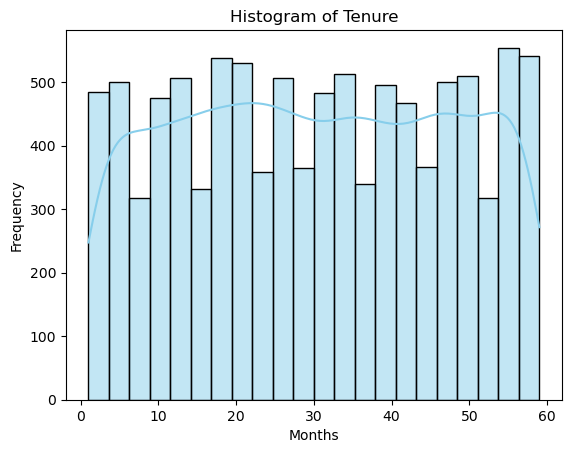

In [105]:
# Plot histogram of tenure_months 
sns.histplot(data['tenure_months'], kde=True, color='skyblue')
plt.title('Histogram of Tenure')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Customer's tenure with the product is between 1 to 60 months and is very evenly distributed with median and mean being 30 months

**Variable - plan_type**

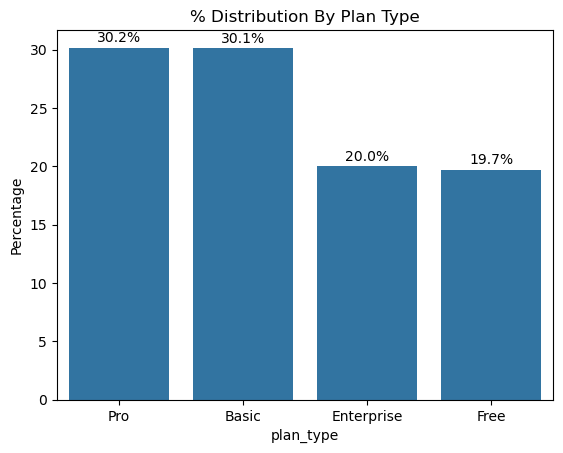

In [109]:
# Plotting distribution on plan_type 

percentages = data['plan_type'].value_counts(normalize=True) * 100

ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.ylabel('Percentage')
plt.title('% Distribution By Plan Type')

for i, v in enumerate(percentages.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
plt.show()

**Observation:** Basic and Pro are most favored plan types by customers with 30% adoption each, followed by Enterprise and Free types with 20% adoption each 

**Variable - satisfaction_score**

In [115]:
# Describe satisfaction_score 
data['satisfaction_score'].describe()

count    10000.000000
mean         6.998253
std          1.455605
min          1.000000
25%          5.992693
50%          7.017274
75%          8.022050
max         10.000000
Name: satisfaction_score, dtype: float64

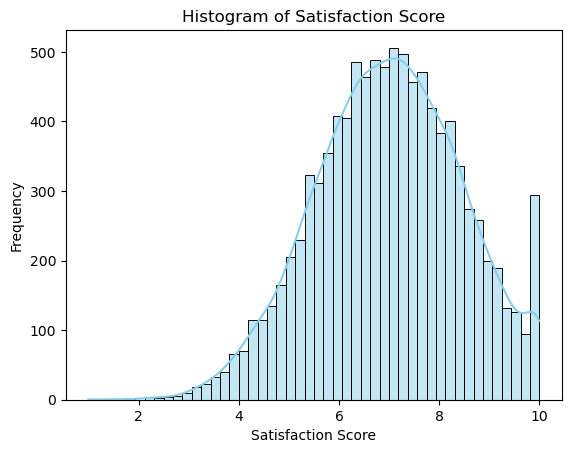

In [117]:
# Plot histogram of satisfaction_score
sns.histplot(data['satisfaction_score'], kde=True, color='skyblue')
plt.title('Histogram of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Satisfaction score is normally distributed with mean of 7

**Variable - uses_new_feature**

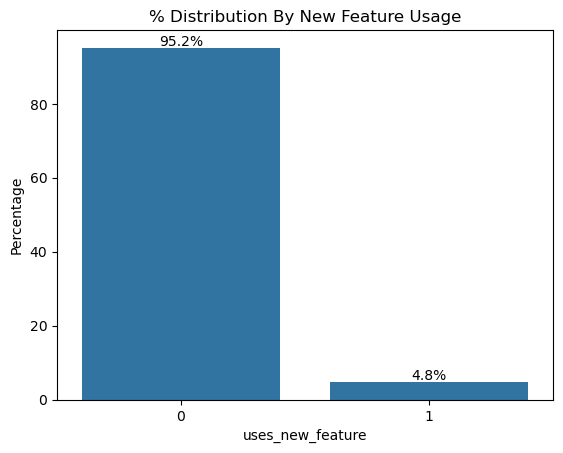

In [123]:
# Plotting distribution on plan_type 

percentages = data['uses_new_feature'].value_counts(normalize=True) * 100

ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.ylabel('Percentage')
plt.title('% Distribution By New Feature Usage')

for i, v in enumerate(percentages.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
plt.show()

**Observation:** New feature has been adopted by 4.8% customers 